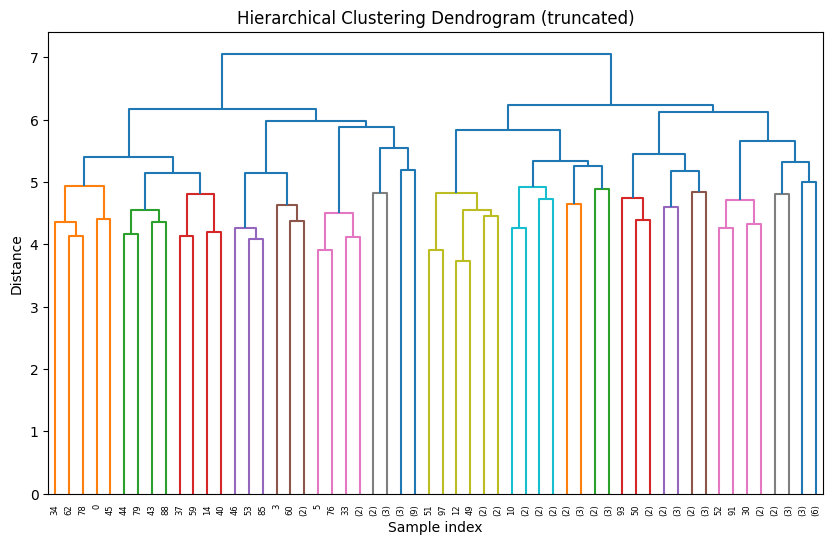

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Example: 100 latent vectors, each of size 128
np.random.seed(42)
latent_vectors = np.random.rand(100, 128)  # Replace this with your actual latent vectors

# Step 1: Perform Agglomerative (Hierarchical) Clustering
n_clusters = 2  # You can choose based on your task or analyze the dendrogram
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = clustering.fit_predict(latent_vectors)

# linkage: Literal['ward', 'complete', 'average', 'single'] = "ward"

# Step 2: Plot clusters (using PCA or t-SNE to reduce to 2D for visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(latent_vectors)

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=labels, palette="tab10")
# plt.title("Hierarchical Clustering on Latent Vectors (PCA 2D projection)")
# plt.show()


# Compute linkage matrix
linked = linkage(latent_vectors, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5) 
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

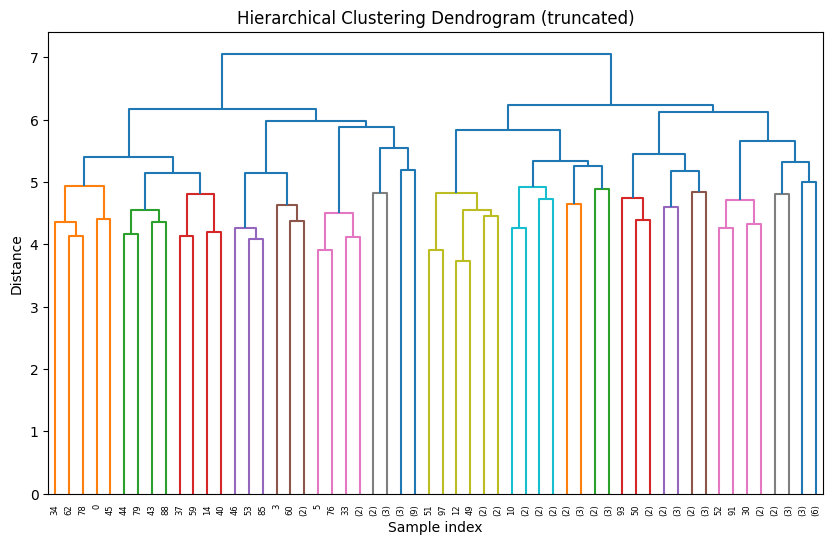

In [ ]:
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

def plot_hierarchical_clustering(model, datasets, labels, colors, title="Hierarchical Clustering Dendrogram (truncated)"):
    
    # Combine all datasets for consistent scaling
    combined_data = np.concatenate(datasets, axis=0)
    
    # Standardize the data
    scaler = StandardScaler()
    combined_data_scaled = scaler.fit_transform(combined_data.reshape(-1, combined_data.shape[-1])).reshape(combined_data.shape)
    
    # Get the model's encoded representation
    if model.VAE_model:
        z_mean, z_std, z = model.encoder.predict(combined_data_scaled)
        latent = z_mean
    else:
        latent = model.encoder.predict(combined_data_scaled)
    
    n_clusters = len(labels)
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage="")
    new_labels = clustering.fit_predict(latent)

    # Reduce latent vectors to 2D for plotting
    #pca = PCA(n_components=2)
    #reduced = pca.fit_transform(latent)
    
    dim_red_2D = {
        "UMAP": lambda latent: umap.UMAP(n_components=2).fit_transform(latent), # random_state=42
    }
    
    points_2D = dim_red_2D["UMAP"](latent) # Loop through each plot function and dataset to plot
    linked = linkage(latent, method='ward') # Compute linkage matrix

    # Plot combined figure
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    axes = axes.flatten()
    plot_proj(points_2D, datasets, colors, labels, axes[0], "Natural clustering")
    #sns.scatterplot(ax=axes[0], x=reduced[:, 0], y=reduced[:, 1], hue=new_labels, palette="tab10")
    #axes[0].set_title("PCA Projection of Latent Vectors (Colored by Cluster)")

    # Dendrogram
    dendrogram(linked, truncate_mode='level', p=5, ax=axes[1])
    axes[1].set_title("Hierarchical Clustering Dendrogram (Truncated)")
    axes[1].set_xlabel("Sample Index")
    axes[1].set_ylabel("Distance")

    plt.tight_layout()
    plt.show()


plot_hierarchical_clustering("", )